In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df_word = pd.read_csv("out/df_altered_word.csv")
df_word = df_word.rename(columns={'Noise Type': 'Type', 'Noise Rate': 'Rate', 'F1 Score': 'F1 Score'})
df_char = pd.read_csv("out/df_altered_char.csv")
df_random = pd.read_csv("out/df_altered_random.csv")
df_bert = pd.read_csv("out/df_altered_bert.csv")  

In [44]:
clean_word = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.75517},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.75517},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.75517},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.75517}
]

clean_char = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.745409},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.745409},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.745409},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.745409}
]
clean_random = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.749719},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.749719},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.749719},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.749719}
]

clean_bert = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.914305},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.914305},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.914305},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.914305}
]

new_word = pd.DataFrame(clean_word)
df_word = pd.concat([new_word, df_word], ignore_index=True)

new_char = pd.DataFrame(clean_char)
df_char = pd.concat([new_char, df_char], ignore_index=True)

new_random = pd.DataFrame(clean_random)
df_random = pd.concat([new_random, df_random], ignore_index=True)

new_bert = pd.DataFrame(clean_bert)
df_bert = pd.concat([new_bert, df_bert], ignore_index=True)

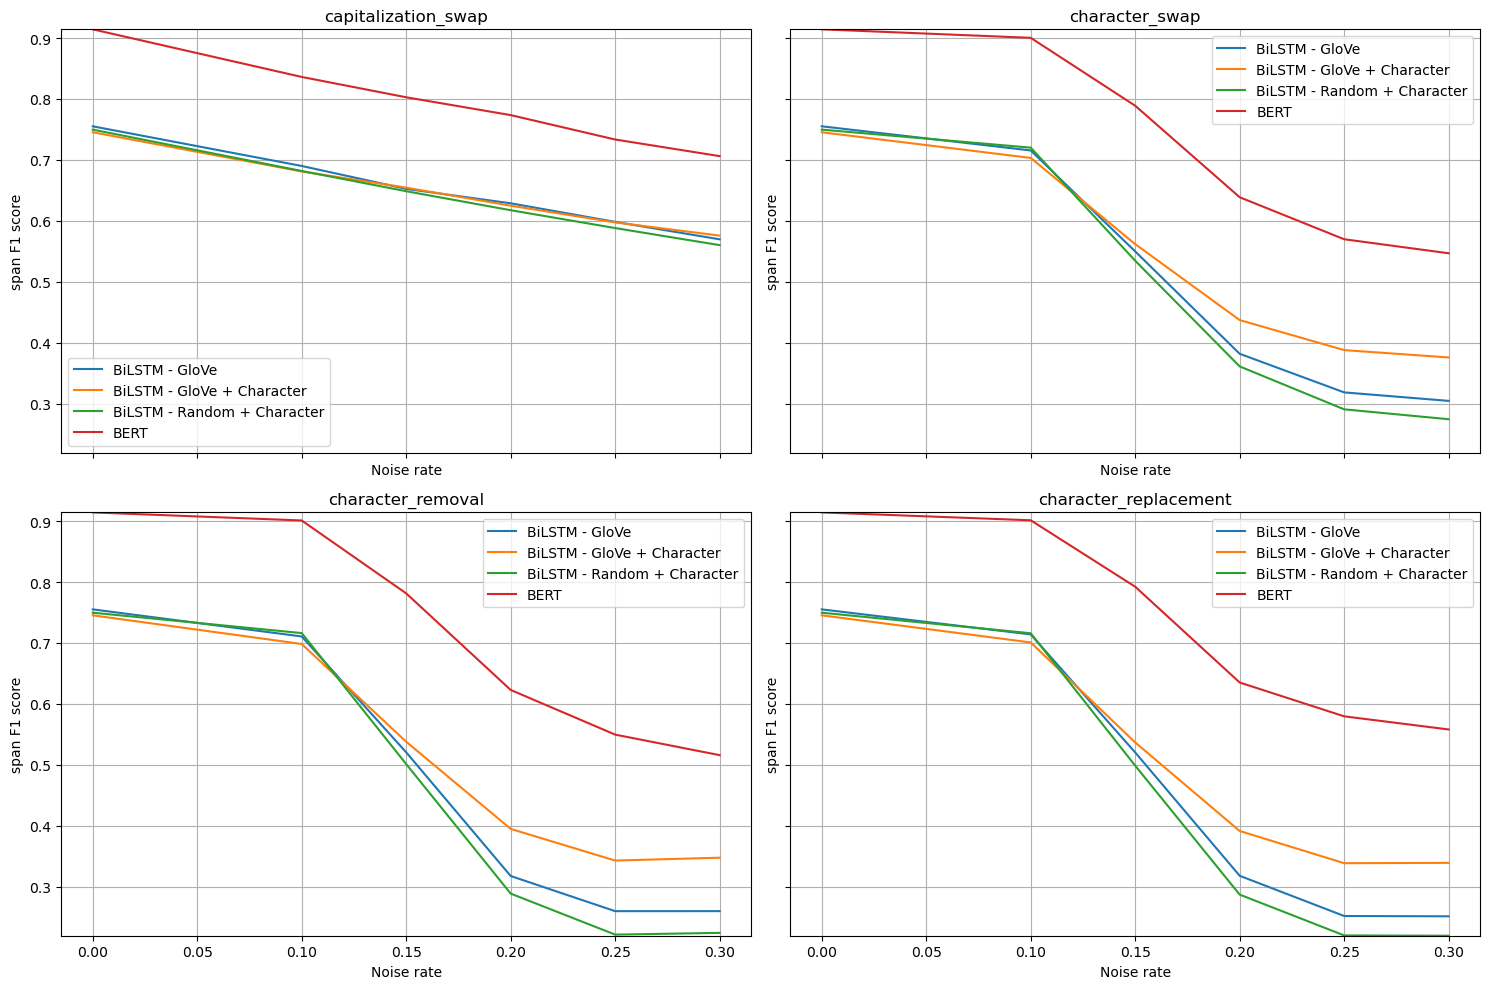

In [45]:
# Get unique noise types
noise_types = df_word['Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min(), df_bert['F1 Score'].min())  
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max(), df_bert['F1 Score'].max())  

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - GloVe')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - GloVe + Character')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - Random + Character')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT') 
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig("out/performance_drop.png") 
plt.show()


#### Altered 2

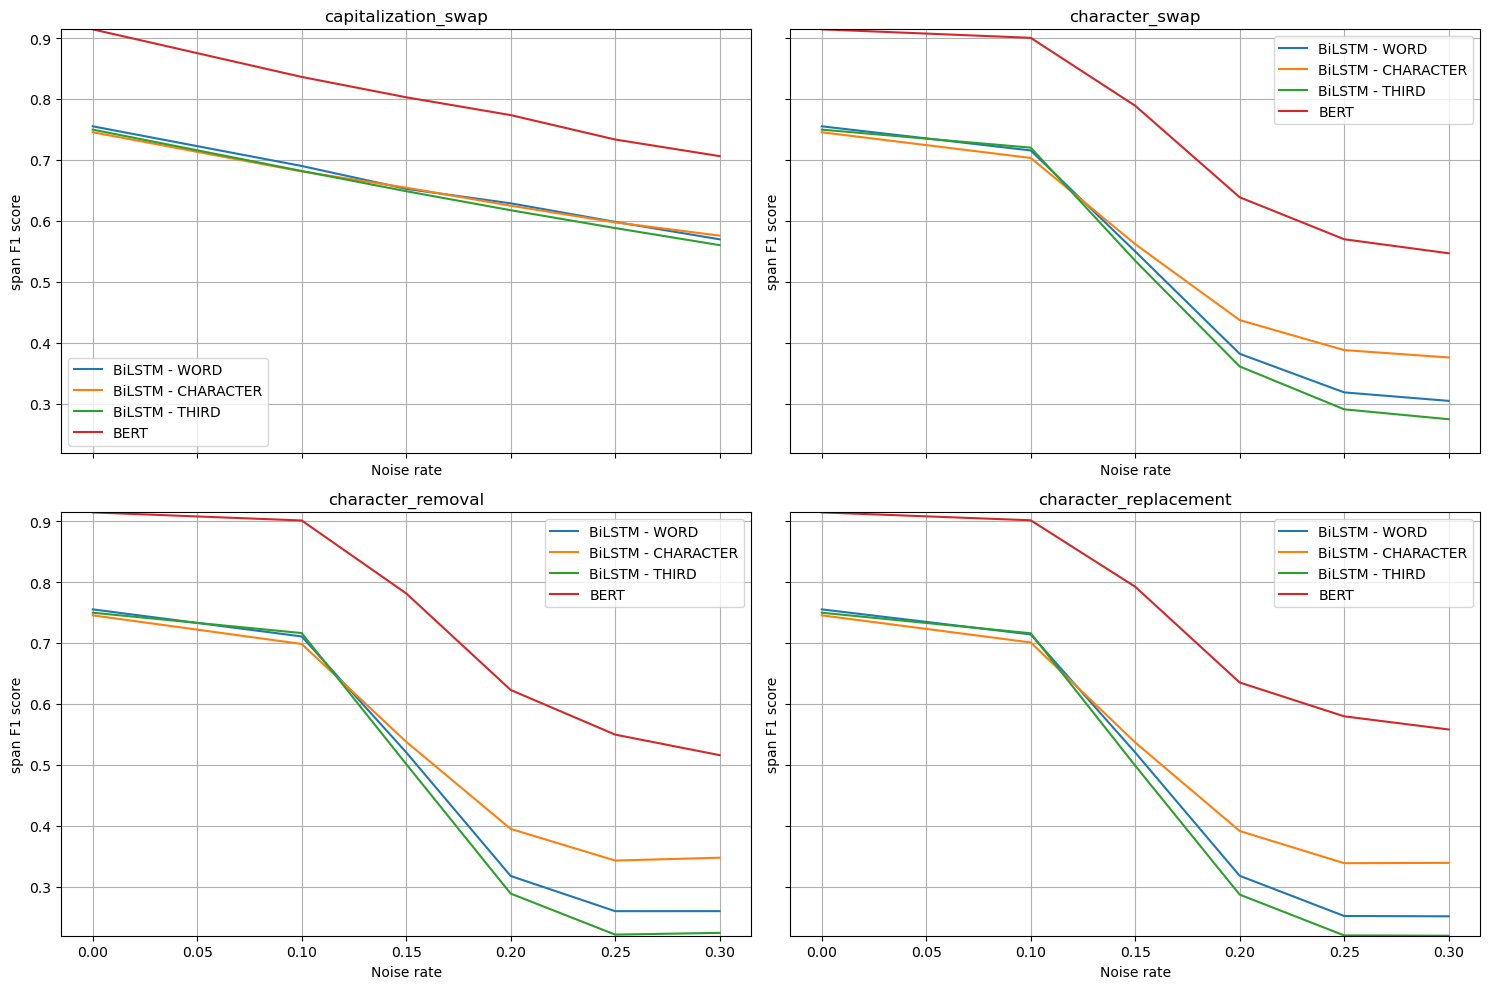

In [46]:
# Get unique noise types
noise_types = df_word['Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min(), df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max(), df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - THIRD')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT')  # Add BERT plot
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


#### Altered 3

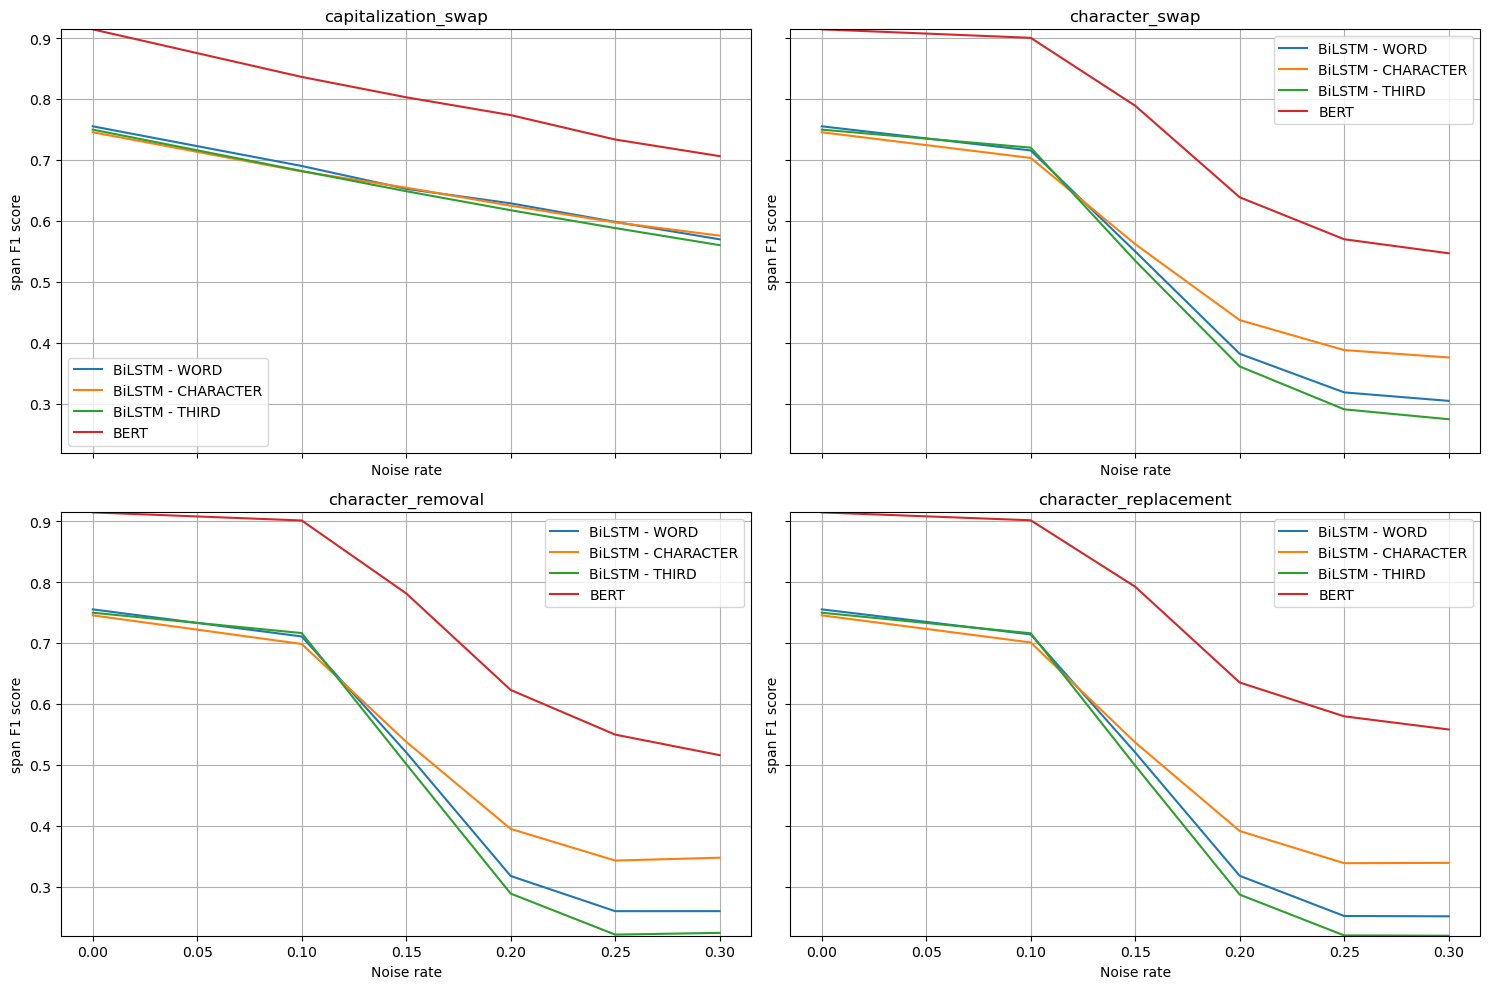

In [47]:
# Get unique noise types
noise_types = df_word['Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min(), df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max(), df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - THIRD')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT')  # Add BERT plot
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [48]:
desired_noise_rates = [0, 0.25, 0.30]

def filter_and_format(df, model_name):
    # Filter the DataFrame for the desired noise rates
    filtered_df = df[df['Noise Rate'].isin(desired_noise_rates)]
    # Add a column for the model name
    filtered_df['Model'] = model_name
    return filtered_df

# Filter each DataFrame
df_word_filtered = filter_and_format(df_word, 'BiLSTM - WORD')
df_char_filtered = filter_and_format(df_char, 'BiLSTM - CHARACTER')
df_random_filtered = filter_and_format(df_random, 'BiLSTM - RANDOM')
df_bert_filtered = filter_and_format(df_bert, 'BERT')

# Combine the filtered DataFrames
combined_df = pd.concat([df_word_filtered, df_char_filtered, df_random_filtered, df_bert_filtered])

# Sort the combined DataFrame by Noise Type and Noise Rate for clarity
combined_df = combined_df.sort_values(by=['Noise Type', 'Noise Rate'])

print(combined_df)


KeyError: 'Noise Rate'

In [49]:
# Rename columns to ensure unique score column names
df_word = df_word.rename(columns={'F1 Score': 'Score_Word'})
df_char = df_char.rename(columns={'F1 Score': 'Score_Char'})
df_random = df_random.rename(columns={'F1 Score': 'Score_Random'})
df_bert = df_bert.rename(columns={'F1 Score': 'Score_Bert'})


# Merge the DataFrames on 'Type' and 'Rate'
combined_df = df_word.merge(df_char, on=['Type', 'Rate'], how='outer')
combined_df = combined_df.merge(df_random, on=['Type', 'Rate'], how='outer')
combined_df = combined_df.merge(df_bert, on=['Type', 'Rate'], how='outer')

# Filter the combined DataFrame for Rate 0 and 0.25
rate_0_df = combined_df[combined_df['Rate'] == 0].set_index('Type')
rate_25_df = combined_df[combined_df['Rate'] == 0.25].set_index('Type')

# Calculate the drop in performance
performance_drop_df = ((rate_25_df[['Score_Word', 'Score_Char', 'Score_Random', 'Score_Bert']] - rate_0_df[['Score_Word', 'Score_Char', 'Score_Random', 'Score_Bert']]) / rate_0_df[['Score_Word', 'Score_Char', 'Score_Random', 'Score_Bert']]) * 100

# Reset the index to have 'Type' as a column
performance_drop_df = performance_drop_df.reset_index()

# Rename columns for clarity
performance_drop_df.columns = ['Type', 'Drop_Score_Word', 'Drop_Score_Char', 'Drop_Score_Random', 'Drop_Score_Bert']

# Display the new DataFrame
print(performance_drop_df)

                    Type  Drop_Score_Word  Drop_Score_Char  Drop_Score_Random  \
0    capitalization_swap       -20.766690       -19.842664         -21.546615   
1         character_swap       -57.822166       -47.956176         -61.222746   
2      character_removal       -65.578299       -53.986978         -70.459174   
3  character_replacement       -66.632609       -54.565016         -70.639638   

   Drop_Score_Bert  
0       -19.774014  
1       -37.676116  
2       -39.883516  
3       -36.602387  


In [50]:
combined_df

,Type,Rate,Score_Word,Score_Char,Score_Random,Score_Bert
0,capitalization_swap,0.00,0.755170,0.745409,0.749719,0.914305
1,character_swap,0.00,0.755170,0.745409,0.749719,0.914305
2,character_removal,0.00,0.755170,0.745409,0.749719,0.914305
3,character_replacement,0.00,0.755170,0.745409,0.749719,0.914305
4,capitalization_swap,0.10,0.690082,0.681062,0.681852,0.836195
5,capitalization_swap,0.15,0.652507,0.654516,0.648644,0.802807
6,capitalization_swap,0.20,0.628815,0.624911,0.617456,0.773558
7,capitalization_swap,0.25,0.598346,0.597500,0.588180,0.733510
8,capitalization_swap,0.30,0.569720,0.575798,0.560166,0.706244
9,character_swap,0.10,0.715556,0.703279,0.720159,0.900361
